In [1]:
%matplotlib inline
import sympy as sym
import pylab as pl
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg

# Mindflow

We want the best approximation of function $f$, on the space $V = \mathrm{span}\{v_i\}$. Remeber that $p\in V$ is best approximation of $f$ if and only if:

$$
(p-f,q)=0, \quad \forall q\in V.
$$

Focus one second on the fact that both $p$ and $q$ belong to $V$. We know that any $q$ can be expressed as a linear combination of the basis functions $v_i$:

$$
(p-f,v_i)=0, \quad \forall v_i\in V.
$$

Moreover $p$ is uniquely defined by the cofficents $p^j$ such that $p = p^j\,v_j$. Collecting this information together we get:

$$
(v_j,v_i) p_j = (f,v_i),\quad \forall v_i\in V.
$$

Now that we know our goal (finiding these $p^j$ coefficents) we do what the rangers do: we explore!

We understaind that we will need to invert the matrix:

$$
M_{ij} = (v_j,v_i) = \int v_i\cdot v_j
$$

What happens if we choose basis functions such that $(v_j,v_i) =  \delta_{ij}$?

How to construct numerical techniques to evaluate integrals in an efficent way?

Evaluate the $L^2$ projection.

## Orthogonal Polynomials

$p_0(x) = 0$

$$
p_k(x) = x^k - \sum_{j=0}^{k-1} \frac{(x^k,p_j(x))}{(p_j(x),p_j(x))}
$$

In [15]:
def scalar_prod(p0,p1):
    return sym.integrate(p0*p1,(t,0,1))

def scalar_prod_11(p0,p1):
    return sym.integrate(p0*p1,(t,0,1))

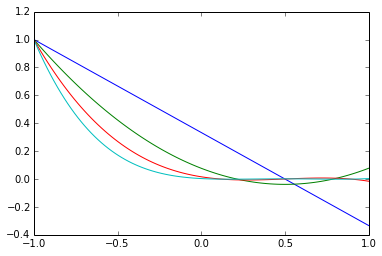

In [16]:
t = sym.symbols('t')
k = 3

Pk = [1]

for k in xrange(1,5):
    s = 0
    for j in xrange(0,k):
        s+= scalar_prod(t**k,Pk[j])/scalar_prod(Pk[j],Pk[j])*Pk[j]
    pk = t**k-s
    #pk = pk/sym.sqrt(scalar_prod(pk,pk))
    fs = sym.lambdify(t, pk, 'numpy')
    pk = pk/fs(-1.)
    Pk.append(pk)


Mij = []
for i in xrange(len(Pk)):
    row = []
    for j in xrange(len(Pk)):
        row.append(scalar_prod(Pk[i],Pk[j]))
    Mij.append(row)

Mij = sym.Matrix(Mij)
Mij

for p in Pk:
    if p != 1 :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))

$v_0 = 1/(b-a)$

$$
\phi_{k+1} = x\, \phi_{k} - (x\phi_k,\phi_k)\, \phi_k
$$

$$
v_{k+1} = \phi_{k+1}/||\phi_{k+1}||
$$

Matrix([[0.250000000000000, 90.2812499996612, -3516837146.15345, 2.07884467082179e+32, -4.29369694560258e+100, 3.78320113312617e+305], [90.2812499996612, 51923.0039058603, -2022618121191.33, 1.19559386107630e+35, -2.46940898545113e+103, 2.17581049390983e+308], [-3516837146.15345, -2022618121191.33, 7.87894335170668e+19, -4.65733803349891e+42, 9.61938059622697e+110, -8.47569170173713e+315], [2.07884467082179e+32, 1.19559386107630e+35, -4.65733803349891e+42, 2.75300844161762e+65, -5.68613138966216e+133, 5.01008314955848e+338], [-4.29369694560258e+100, -2.46940898545113e+103, 9.61938059622697e+110, -5.68613138966216e+133, 1.17442757137001e+202, -1.03479490403534e+407], [3.78320113312617e+305, 2.17581049390983e+308, -8.47569170173713e+315, 5.01008314955848e+338, -1.03479490403534e+407, 9.11763755825643e+611]])


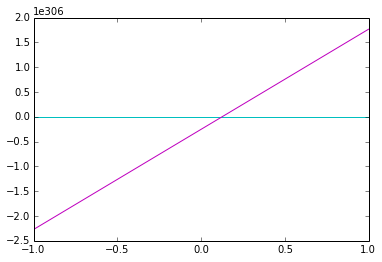

In [17]:
Phi = [.5]

for k in xrange(0,5):
    phi = t*Phi[k] - scalar_prod_11(t*Phi[k],Phi[k])*Phi[k]
    phi = phi/sym.sqrt(scalar_prod_11(pk,pk))
    Phi.append(phi)

Mij = []
for i in xrange(len(Phi)):
    row = []
    for j in xrange(len(Phi)):
        row.append(scalar_prod_11(Phi[i],Phi[j]))
    Mij.append(row)

Mij = sym.Matrix(Mij)
print(Mij)

x = np.linspace(-1,1,100)

for p in Phi:
    if p != .5 :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))



## Th

Le $q$ be nonzero polynomial of degree $n+1$ and $\omega(x)$ a positive weight function, s. t.:

$$
\int_a^b x^k q(x)\, \omega(x) = 0, \quad k = 0,\ldots, n
$$

If $x_i$ are zeros of $q(x)$, then:

$$
\int_a^b f(x)\, \omega(x)\approx \sum_{i=0}^nw_i\, f(x_i)
$$

with:

$$
w_i = \int_a^b l_i(x)\, \omega(x)
$$

is exact for all polynomials of degree at most $2n+1$. Here $l_i(x)$ are the usual Lagrange interpolation polynomials.

**Proof:** assume $f(x)$ is a polynomial of degree at most $2n+1$ and show:
$$
\int_a^b f(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i).
$$
Usign the polynomial division we have:
$$
\underbrace{f(x)}_{2n+1} = \underbrace{q(x)}_{n+1}\, \underbrace{p(x)}_{n} + \underbrace{r(x)}_{n}.
$$
By taking $x_i$ as zeros of $q(x)$ we have:
$$
f(x_i) = r(x_i)
$$
Now:
$$
\int_a^b f(x)\, \omega(x) = \int_a^b [q(x)\, p(x) + r(x)]\, \omega(x)
$$
$$
 = \underbrace{\int_a^b q(x)\, p(x) \, \omega(x)}_{=0} + \int_a^b r(x)\, \omega(x)
$$
Since $r(x)$ is a polynomial of order $n$ this is exact:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, r(x_i)
$$

But since we choosed $x_i$ such that $f(x_i) = r(x_i)$, we have:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i) 
$$

This completes the proof.

## Legendre Polynomial

alternatively:

$$
v_{k+1} = \phi_{k+1}/\phi_{k+1}(1)
$$

$$
(n+1) P^{n+1}(x) = (2n+1)\, x\, P^n(x) - n\, P^{n-1}(x)
$$

In [ ]:
Pn = [1.,t]

#Pn = [1.,x, ((2*n+1)*x*Pn[n] - n*Pn[n-1])/(n+1.) for n in range(1,2)]

for n in xrange(1,5):
    pn1 = ((2*n+1)*t*Pn[n] - n*Pn[n-1])/(n+1.)
    Pn.append(sym.simplify(pn1))
    
print Pn

#print(sym.poly(p))
#print(sym.real_roots(sym.poly(p)))
print(sym.integrate(Pn[4]*Pn[3],(t,-1,1)))

for p in Pn:
    if p != 1. :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))


Quadrature points roots of the Legendre polynomial. Why is that important?

In [ ]:
print(sym.real_roots(sym.poly(Pn[2])))

#q = [-1.]+sym.real_roots(sym.poly(Pn[2]))+[1.]
q = sym.real_roots(sym.poly(Pn[3]))
print(q)

#for p in Pn:
#    if p != 1. :
#        #print(sym.poly(p))
#        #print(sym.real_roots(sym.poly(p)))
#        print(sym.nroots(sym.poly(p)))

Lg = [1. for i in xrange(len(q))]
print(Lg)

#for i in xrange(n+1):
for i in xrange(len(q)):
    for j in xrange(len(q)):
        if j != i:
            Lg[i] *= (t-q[j])/(q[i]-q[j])

print(Lg)

x = np.linspace(-1,1,100)

for l in Lg:
    fs = sym.lambdify(t, l, 'numpy')
    _ = pl.plot(x,fs(x))

$$
w_i = \int_{-1}^{1} l_i(x)
$$

In [ ]:
for l in Lg:
    print(sym.integrate(l,(t,-1,1)))

### Hint
Proiezione usando polinomi LEGENDRE (f,v_i)

# Now let's get Numerical

From now on I work on the $[0,1]$ interval, becouse i like it this way :)

[doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.legroots.html#numpy.polynomial.legendre.legroots)

In [ ]:
def gauss_points(nq):
    if nq==1:
        return 0
    elif q>1:
        coeffs = np.zeros(nq+1)
        coeffs[-1] = 1.
        return .5* leg.legroots(coeffs)+.5

In [ ]:
print gauss_points(3)
print(np.sqrt(3./5.)*.5)+.5

In [ ]:
def define_lagrange_basis_set(q):
    n = q.shape[0]
    L = [n_poly.Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in xrange(n)]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L

def define_legandre_basis_set(q):
    #
    #
    return L

differenza fra le roots "simboliche" e non

In [ ]:
Nq = n+1
p,w = leg.leggauss(Nq)
w = .5 * w
p = .5*(p+1)
#print p
#print w
W = np.diag(w)
#print W

In [ ]:
B = zeros((n,Nq))
for i in range(n):
    B[i,:] = L[i](p)

## Diference in between projection and interpolation runge example 

Proiezione usando polinomi LEGENDRE (f,v_i) con quadratura con 18 punti

Interpolazione usando polinomi LAGRANGE (sui punti di quadratura che sono i punti di gauss della funzione sopra)